In [26]:
import pandas as pd
df=pd.read_csv('train_bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Feature Engineering Part

<p>As we know feature engineering is very important in order to convert the data so that it could be trained in the model in an effective manner.</p>
<p>Feature Engineering Steps</p>
<li>Imputation</li>

In [27]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Since there is no empty values , so we are not required to perform imputation


<li>Handling Outliers:Sometimes keeping outilers may effect the performance of regression models such as Linear/Logistic.So checking and resolving them becomes critical for better model's respective performance  </li>

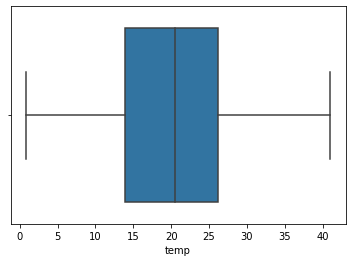

In [28]:
import seaborn as sns
sns.boxplot(df["temp"])

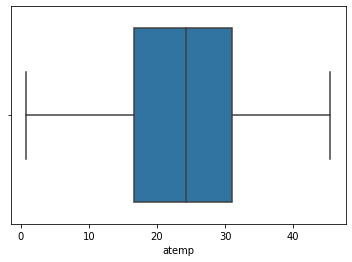

In [29]:
sns.boxplot(df["atemp"])

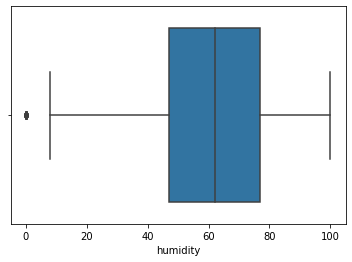

In [30]:
sns.boxplot(df["humidity"])

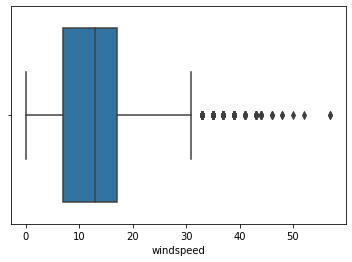

In [31]:
sns.boxplot(df["windspeed"])

In these graphs we can find that windspeed only has outliers so before building model we need to treat this.

In [32]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


So windspeed's 50% value is 13 So after 17 we need to treat that outlier with 13

In [33]:
df['windspeed_outlier']=df['windspeed']

In [34]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_outlier
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0


In [35]:
for i in list(df[df['windspeed']>17].index):
    df.iloc[i,12]=13

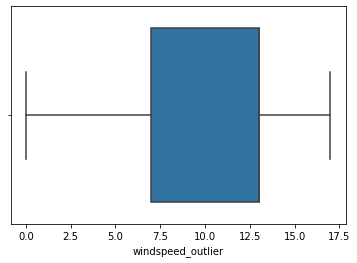

In [36]:
sns.boxplot(df["windspeed_outlier"])

So outliers are treated and and can be used for the model that require only outlier's treatment.
<li>Feature Transformation</li>

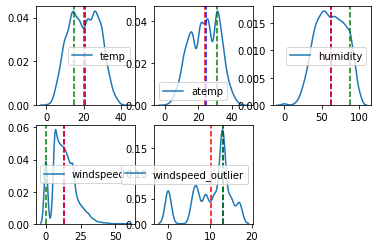

In [37]:
#distribution od valued data to check distribution of data
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
a=['temp','atemp','humidity','windspeed',"windspeed_outlier"]
for i in range(len(a)):
    plt.subplot(int('23'+str(i))+1)
    sns.kdeplot(df[a[i]])
    plt.axvline(np.median(df[a[i]]),color='b', linestyle='--')
    plt.axvline(np.mean(df[a[i]]),color='r', linestyle='--')
    plt.axvline(stats.mode(df[a[i]])[0],color='g', linestyle='--')
plt.show()

In order to apply some transformation we need to look at its distribution . As we can see that some feaatures are likely to be normal while others are not. So we need to look at that individually

This will be done using gausian transformation.So that we can use these feature in ML models like Linear and logistic regression

In [38]:
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature+"'s Distribution")
    plt.show()

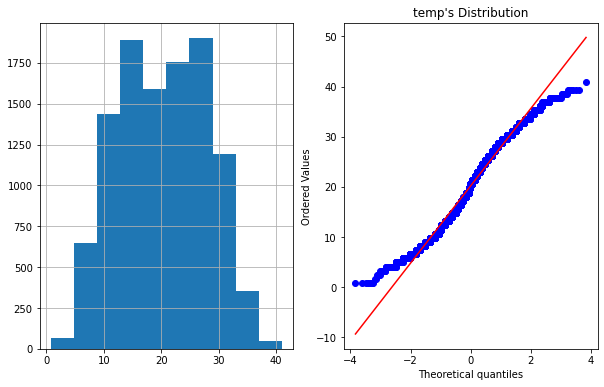

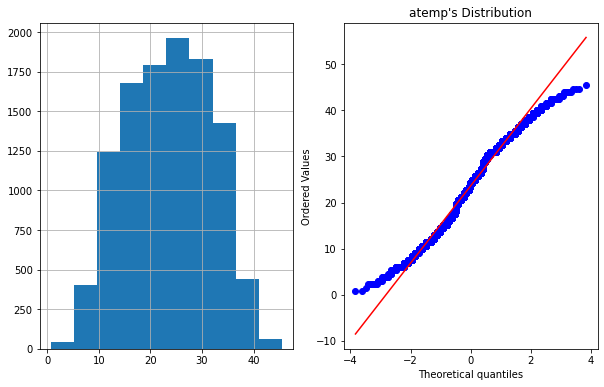

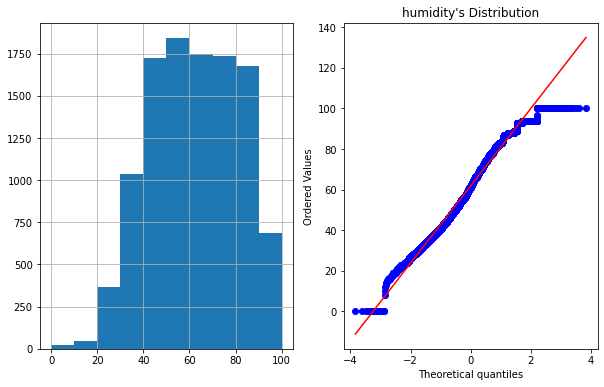

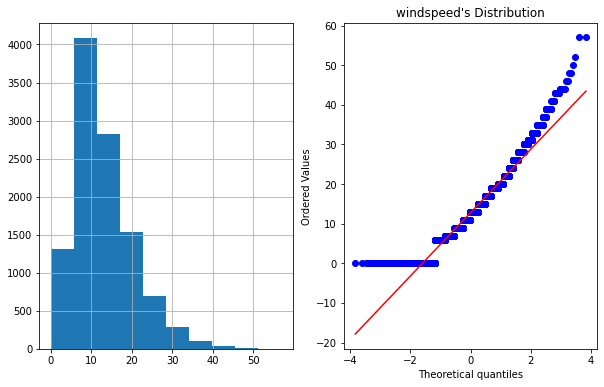

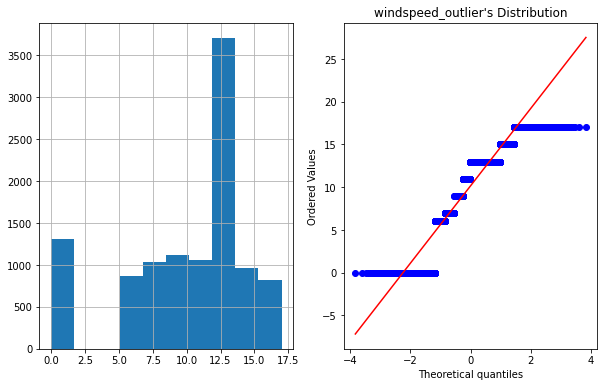

In [40]:
for i in a:
    plot_data(df,i)

We can see that these distibution are not in straight line so we will apply different opperation to treat them accordingly

In [46]:
a=['temp','atemp']
for i in a:
        df[i+'_log']=np.log(df[i])
        df[i+'_reciprocal']=1/df[i]
        df[i+'_sqaure']=df[i]**(1/2)
        df[i+'_exponential']=df[i]**(1/1.2)

In [47]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_sqaure,temp_exponential,atemp_log,atemp_reciprocal,atemp_sqaure,atemp_exponential,humidity_log,humidity_reciprocal,humidity_sqaure,humidity_exponential
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,3.136877,6.721960,2.666881,0.069469,3.794074,9.229462,4.394449,0.012346,9.000000,38.940738
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,3.003331,6.251805,2.612640,0.073341,3.692560,8.821571,4.382027,0.012500,8.944272,38.539699
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,3.003331,6.251805,2.612640,0.073341,3.692560,8.821571,4.382027,0.012500,8.944272,38.539699
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,3.136877,6.721960,2.666881,0.069469,3.794074,9.229462,4.317488,0.013333,8.660254,36.521706
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,3.136877,6.721960,2.666881,0.069469,3.794074,9.229462,4.317488,0.013333,8.660254,36.521706


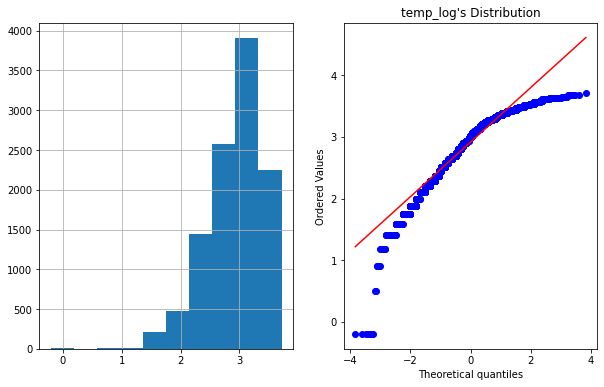

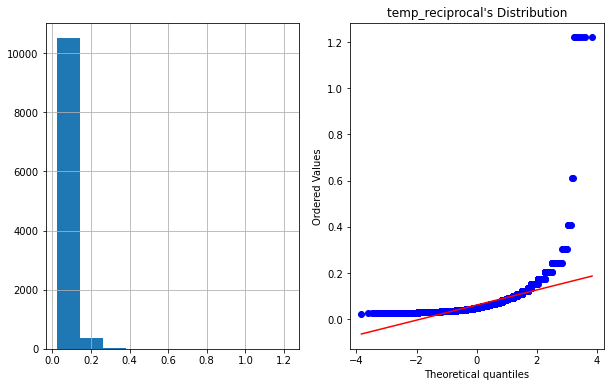

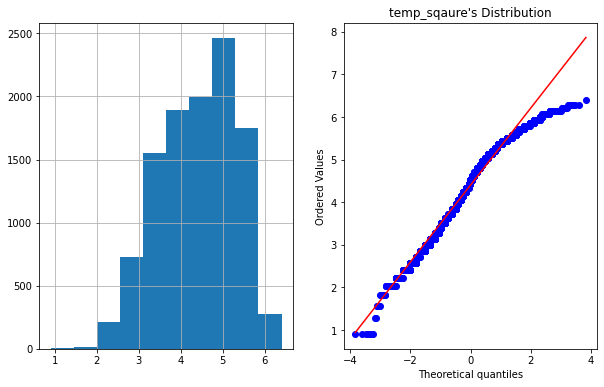

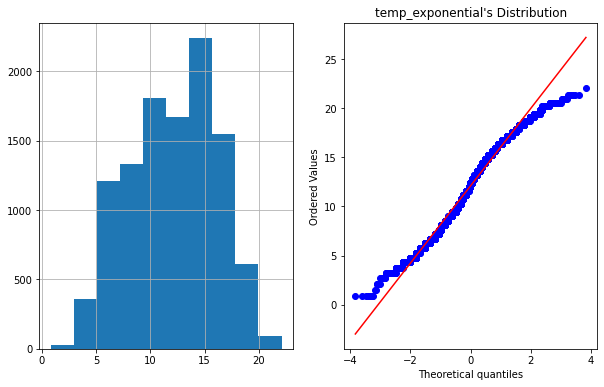

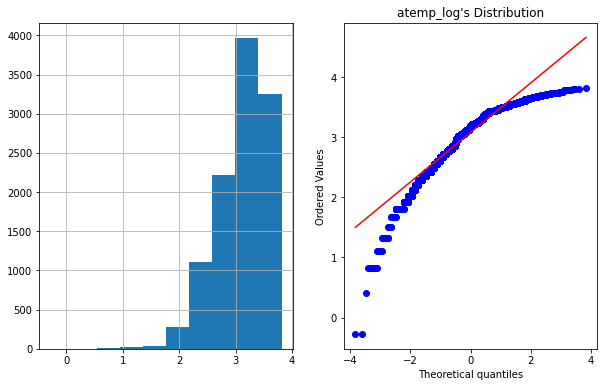

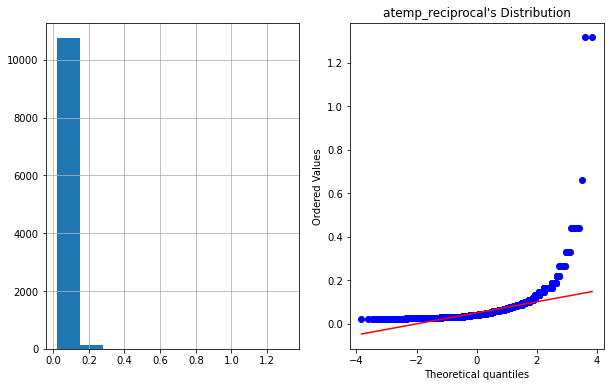

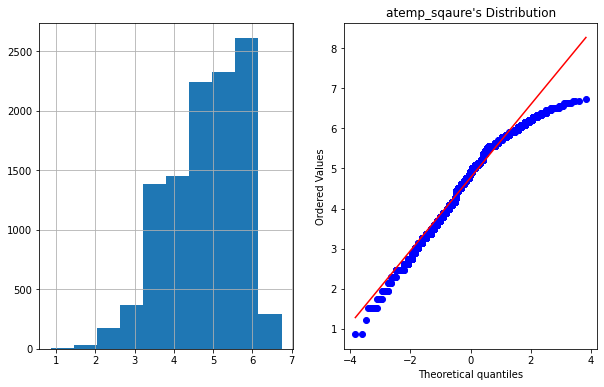

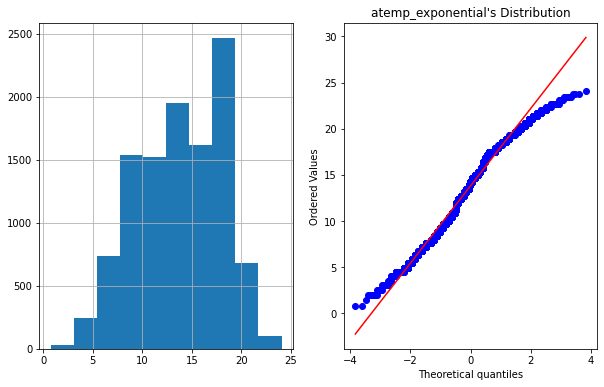

In [48]:
for i in a:
    try:    
        plot_data(df,i+'_log')
        plot_data(df,i+'_reciprocal')
        plot_data(df,i+'_sqaure')
        plot_data(df,i+'_exponential')
    except:
        pass

We are choosing without windspeed column because we cannot imply it only on two columns only

So we need to look at these as well..... After Feature selection . In this we have chosen for only forward selection

In [55]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
forward_selection(df[[ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 
       'windspeed_outlier', 'temp_log', 'temp_reciprocal', 'temp_sqaure',
       'temp_exponential', 'atemp_log', 'atemp_reciprocal', 'atemp_sqaure',
       'atemp_exponential']],df['count'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['atemp',
 'casual',
 'registered',
 'atemp_log',
 'season',
 'workingday',
 'temp_log',
 'temp',
 'holiday',
 'humidity',
 'windspeed_outlier',
 'temp_sqaure',
 'windspeed']